In [9]:
%load_ext autoreload
%autoreload 2

from datasets.clock import ClockConfig, ClockDatasetConfig
from datasets.clock import get_dataloaders
from clock.vis import load_model_script, visualize_latent, visualize_predictions, visualize_reconstruction, print_model_parameters, show_data
from clock.utils import eval_model, load_model_state_dict
from models.autoencoders import MLPResnetAutoencoder
import torch
import torch.nn as nn
import sys
import os
import numpy as np
import functools

from models.decoders import ResNetDecoder3
from models.encoders import ConvMLPEncoder

sys.path.append(os.path.join(os.getcwd(), '..'))

device = "cuda" if torch.cuda.is_available() else "cpu"


# def hand_width_scheduler(idx, alpha=1e-3):
#   """
#   Returns a value for hand width, ranging from ~0.2 to ~0.05
#   alpha: how fast the hand width decreases
#   """
#   mean = -3 * torch.tensor(idx*alpha).sigmoid()
#   return np.random.lognormal(mean, 0.01)

IMG_SIZE=64
BATCH_SIZE=128

dataloader, val_dataloader, _, _ = get_dataloaders(
  data_config=ClockConfig(
    hour_hand_width=0.1,
    minute_hand_width=0.075,
    minute_hand_start=1/3,
  ),
  dataset_config=ClockDatasetConfig(
      data_size=2**24,
      augment=dict(
        noise_std=0.01,
      ),
      img_size=64,
    ),
  batch_size=BATCH_SIZE,
)

model_dir="saved_models/ResNetDecoder3/Ad20-841285"

LATENT_DIM=2
load_model_checkpoint = functools.partial(
  load_model_state_dict, 
  model_class=ResNetDecoder3, 
  model_dir=model_dir,
)

model, type_ = load_model_checkpoint(checkpoint=0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
print_model_parameters(functools.partial(load_model_checkpoint, checkpoint=0))

AttributeError: 'tuple' object has no attribute 'to'

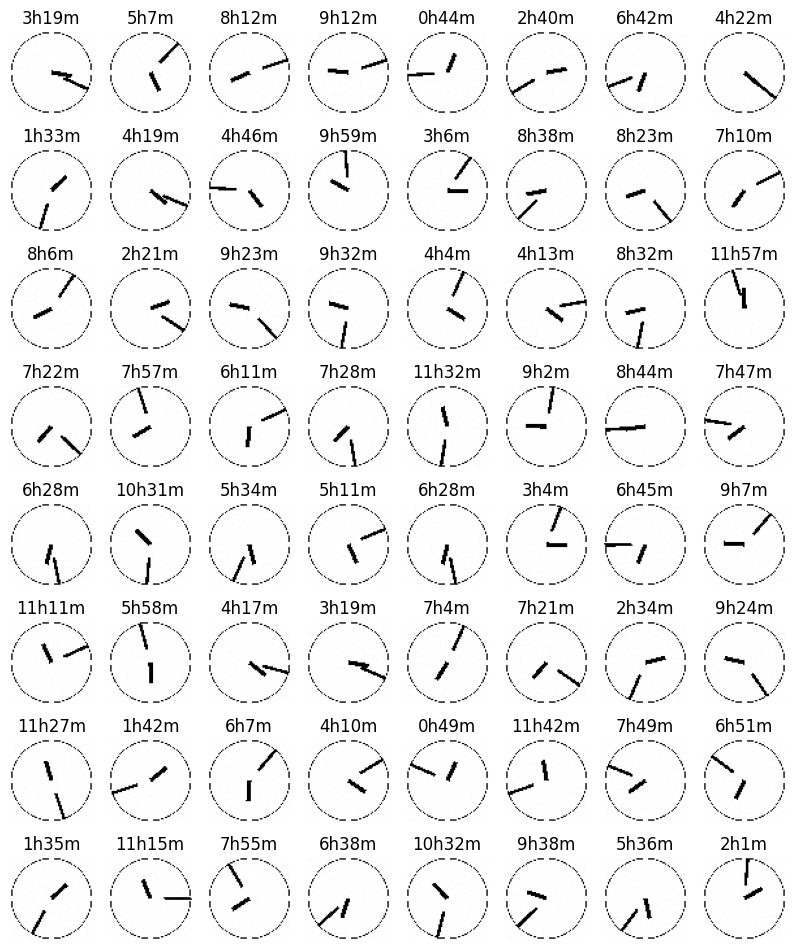

In [3]:
for i in range(1):
  show_data(dataloader)

In [ ]:
model = load_model_checkpoint(checkpoint=8)
eval_model(model=model, type_=type_, latent_dim=LATENT_DIM, loss_fn=nn.SmoothL1Loss(), val_data=[i for i in val_dataloader], device=device)

0.0088244158832822

# Encoders

In [5]:
visualize_predictions(type_, model, dataloader, latent_dim=LATENT_DIM)

Not encoder


# Decoders

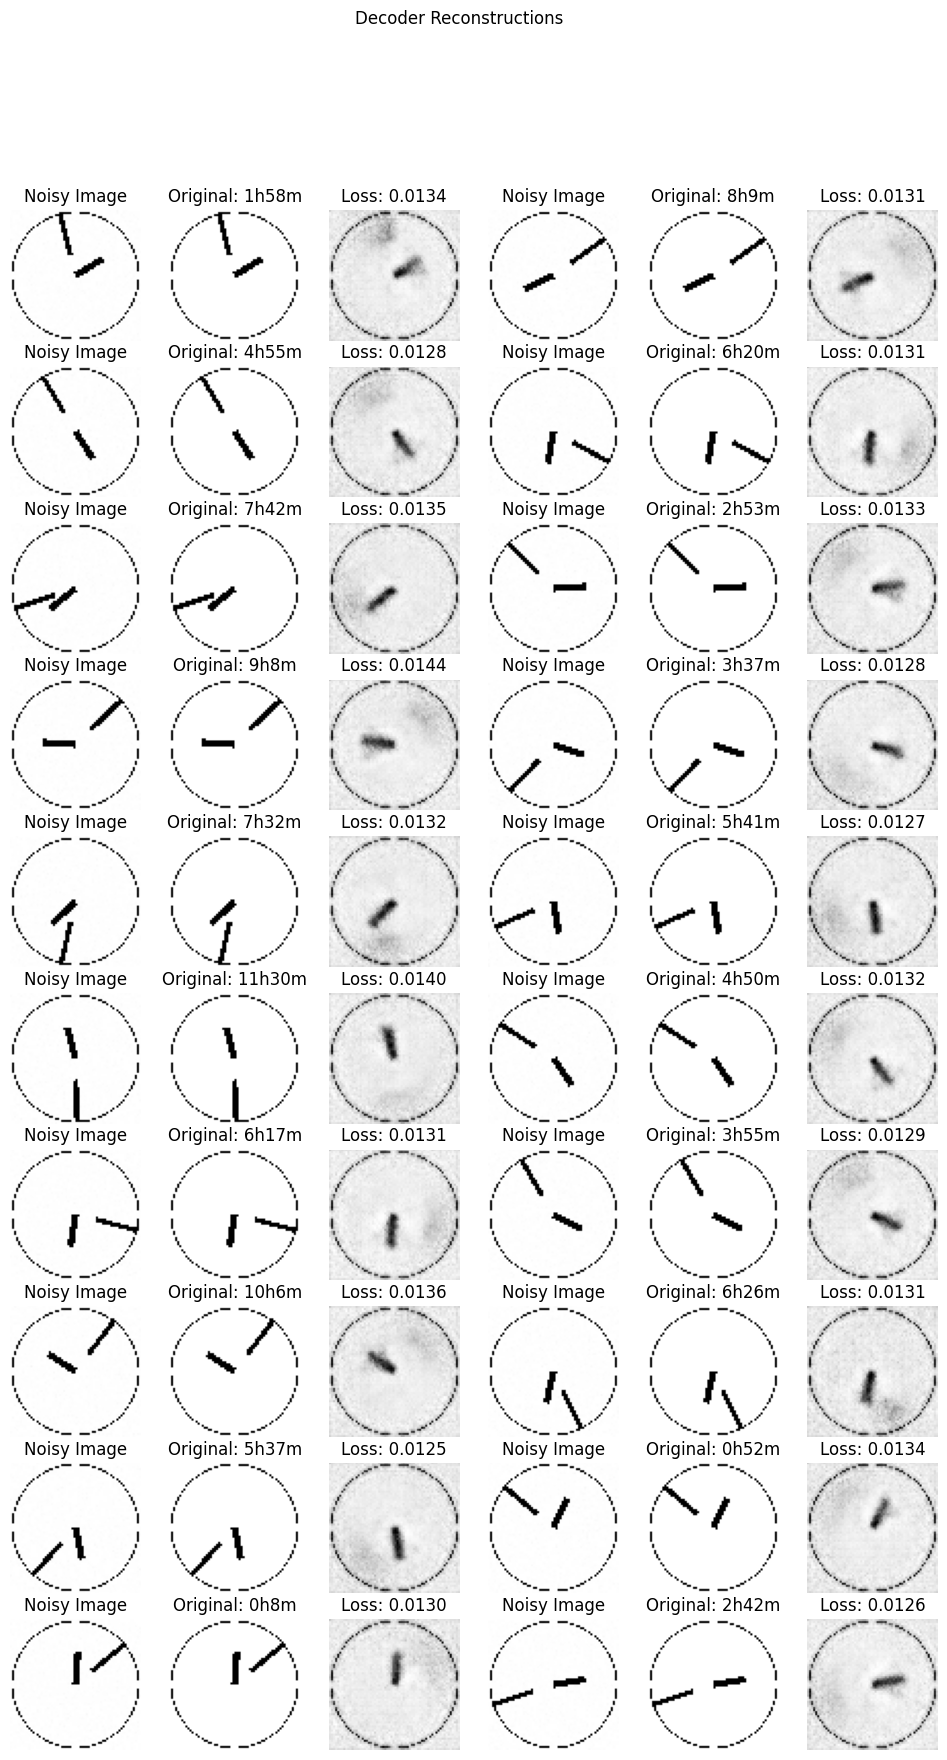

: 

In [ ]:
model, type_ = load_model_checkpoint(checkpoint=7)
visualize_reconstruction(type_, model, dataloader, latent_dim=LATENT_DIM)

# Autoencoders

100%|██████████| 16/16 [00:27<00:00,  1.75s/it]


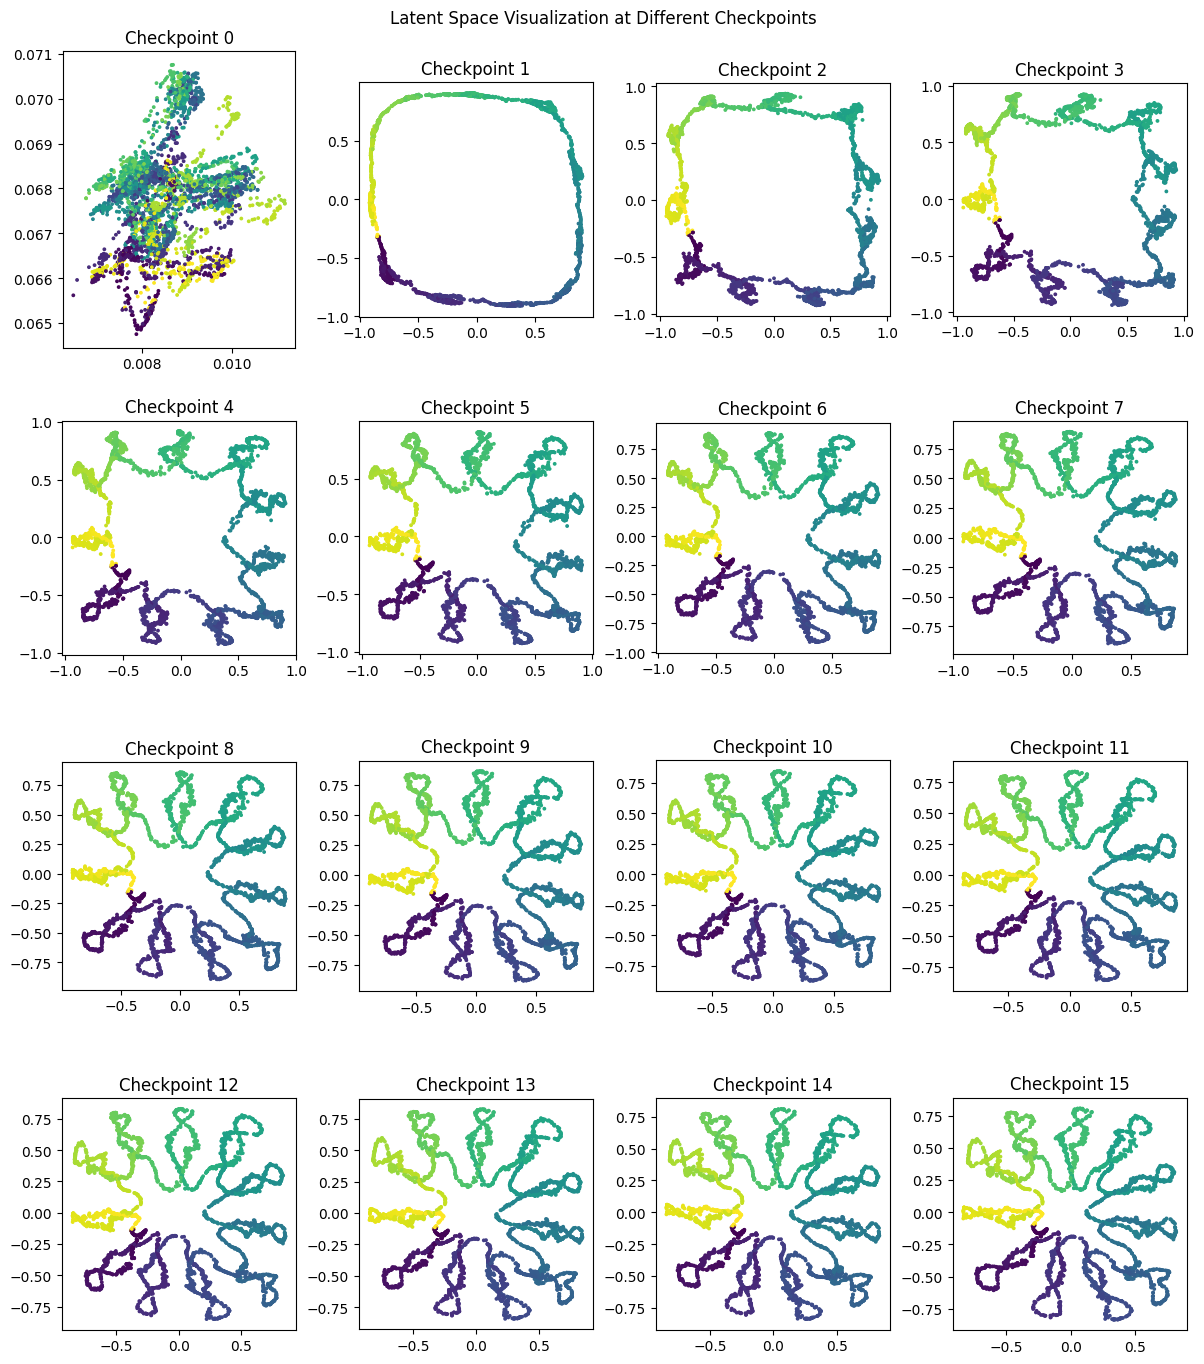

: 

In [ ]:
import json
from clock.utils import load_model_state_dict
from clock.vis import get_outputs
from datasets.clock import get_dataloaders
from datasets.clock import ClockConfig, ClockDatasetConfig
from models.autoencoders import MLPResnetAutoencoder
import matplotlib.pyplot as plt
import torch
import numpy as n
from tqdm import tqdm
from sklearn.decomposition import PCA

fig, ax = plt.subplots(4, 4, figsize=(12, 14))

for i in tqdm(range(16)):
  model = load_model_checkpoint(checkpoint=i)
  
  latents = []
  labels1d = []
  for _, _, label1d, _, latent, _ in get_outputs(type_, model, dataloader, limit=4096):
    latents.append(latent.unsqueeze(0).cpu())
    labels1d.append(label1d.unsqueeze(0).cpu())
    
  latents = torch.cat(latents, dim=0)
  labels1d = torch.cat(labels1d, dim=0)
  
  if LATENT_DIM > 2:
    pca = PCA(n_components=2)
    latents = pca.fit_transform(latents)
  
  ax[i//4, i%4].scatter(latents[:, 0], latents[:, 1], c=labels1d, cmap="viridis", s=3)
  ax[i//4, i%4].set_title(f"Checkpoint {i}")
  ax[i//4, i%4].set_aspect('equal', adjustable='box')
  
plt.suptitle("Latent Space Visualization at Different Checkpoints")
plt.subplots_adjust(top=0.9)
plt.tight_layout()
plt.show()
